# Import libraries

In [1]:
# General
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers:
from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Imputer, LabelEncoder

# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report,confusion_matrix
print("Setup complete...")

Setup complete...


# Load data

In [2]:
data = pd.read_csv('Toddler Autism dataset July 2018.csv')
data.shape

(1054, 19)

# Data Preparation

In [3]:
data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

### Remove unnesscary columns

In [4]:
data.drop(['Case_No','Who completed the test','Qchat-10-Score'],axis=1, inplace=True)

In [5]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,Yes


### One hot coding

In [6]:
le = LabelEncoder()
columns = ['Ethnicity','Family_mem_with_ASD','Class/ASD Traits ','Sex','Jaundice']
for col in columns:
    data[col] = le.fit_transform(data[col])
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0,8,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,5,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,8,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,5,0,1,1


### Normalize data

In [10]:
#first scale the variables
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [11]:
x_scaled = data[['Age_Mons','Ethnicity']]

In [12]:
scaler.fit(x_scaled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_features = scaler.transform(x_scaled)
scaled_features[0:5]

array([[ 0.01665219,  1.01873466],
       [ 1.01958993, -0.41165566],
       [ 1.01958993,  1.01873466],
       [-0.48481667, -2.79563951],
       [-0.98628554, -0.41165566]])

In [16]:
normalized_data = data.copy()
normalized_data['Age_Mons'] = scaled_features[:,0]
normalized_data['Ethnicity'] = scaled_features[:,1]
normalized_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,0.016652,0,1.018735,1,0,0
1,1,1,0,0,0,1,1,0,0,0,1.019590,1,-0.411656,1,0,1
2,1,0,0,0,0,0,1,1,0,1,1.019590,1,1.018735,1,0,1
3,1,1,1,1,1,1,1,1,1,1,-0.484817,1,-2.795640,0,0,1
4,1,1,0,1,1,1,1,1,1,1,-0.986286,0,-0.411656,0,1,1


### Split data into X & Y

In [17]:
X = normalized_data.drop(['Class/ASD Traits '], axis = 1)
Y = normalized_data['Class/ASD Traits ']

### Split data into train - test set

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

# KNN Classifier

### Train - Test Split

In [19]:
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]

for i in range (1,50):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i= knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

### Select k valules

Text(0,0.5,'Error Rate')

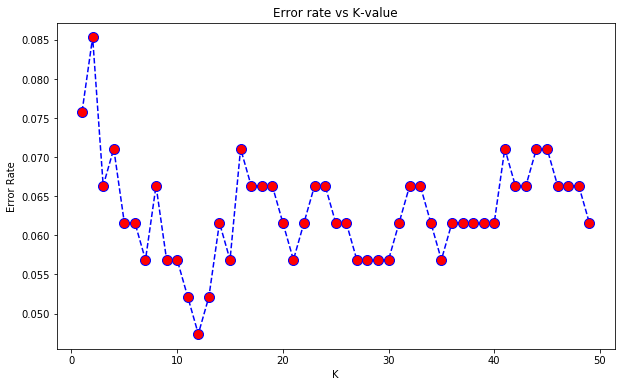

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### k = 11

In [21]:
knn= KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

### Result

In [22]:
pred = knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 57   5]
 [  6 143]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        62
           1       0.97      0.96      0.96       149

   micro avg       0.95      0.95      0.95       211
   macro avg       0.94      0.94      0.94       211
weighted avg       0.95      0.95      0.95       211

